In [1]:
#%reset
import pandas as pd
%pylab inline
import seaborn as sns
sns.set(style="darkgrid")

Populating the interactive namespace from numpy and matplotlib


# Load data

In [2]:
customers_data_ini = pd.read_csv(
    'customers_data.csv', decimal=',', index_col=0)

customers_data = customers_data_ini[
    [col for col in customers_data_ini.columns
     if col not in ['order_purchase_timestamp']]]

# Analyse repartion and correlation

In [3]:
customers_data['payment_value'].describe()

count    94720.000000
mean       161.890176
std        226.122203
min          9.590000
25%         62.410000
50%        105.830000
75%        177.440000
max      13664.080000
Name: payment_value, dtype: float64

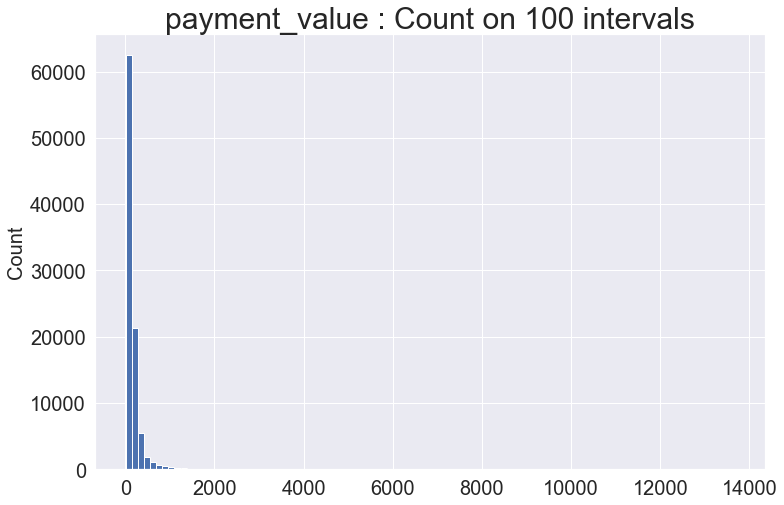

In [4]:
# Define intervals number
intervals_n = 100

# Plot cross table representing proportion of labels in each cut
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
customers_data.hist(column=['payment_value'],bins=intervals_n, ax=ax)

plt.title('payment_value : Count on '+str(intervals_n)+' intervals', size=30)
plt.ylabel("Count", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Index(['pay_type_boleto', 'pay_type_credit_card', 'pay_type_debit_card',
       'pay_type_voucher', 'review_score', 'order_item_id',
       'payment_sequential', 'price', 'dist_to_seller', 'comment_propensity',
       'payment_installments', 'payment_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'freight_value', 'order_week_day',
       'moment_of_day', 'delivery_delay', 'order_id', 'prod_cat_auto',
       'prod_cat_baby', 'prod_cat_bed_bath_table',
       'prod_cat_computers_accessories', 'prod_cat_cool_stuff',
       'prod_cat_electronics', 'prod_cat_fashion_bags_accessories',
       'prod_cat_furniture_decor', 'prod_cat_garden_tools',
       'prod_cat_health_beauty', 'prod_cat_housewares', 'prod_cat_other',
       'prod_cat_perfumery', 'prod_cat_pet_shop', 'prod_cat_sports_leisure',
       'prod_cat_stationery', 'prod_cat_telephony', 'prod_cat_t

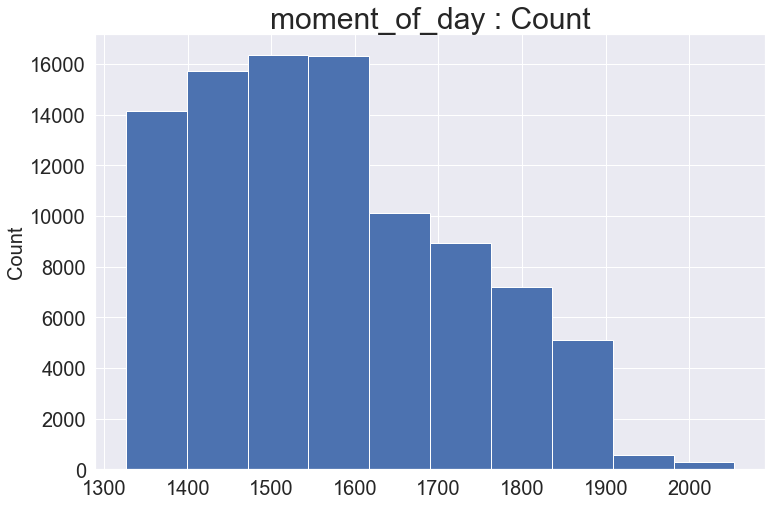

In [5]:
# Define intervals number
print(customers_data.columns)
# Plot cross table representing proportion of labels in each cut
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
customers_data.hist(column=['last_purchase_days'], ax=ax)

plt.title('moment_of_day : Count', size=30)
plt.ylabel("Count", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

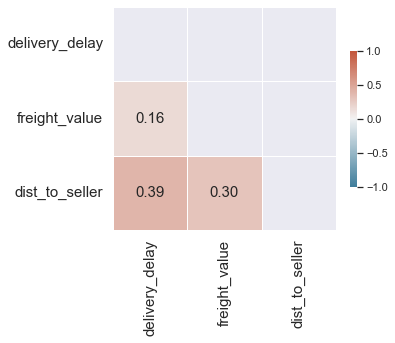

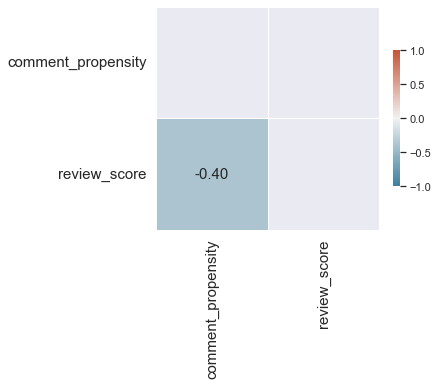

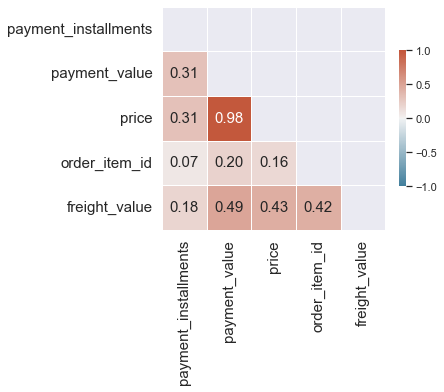

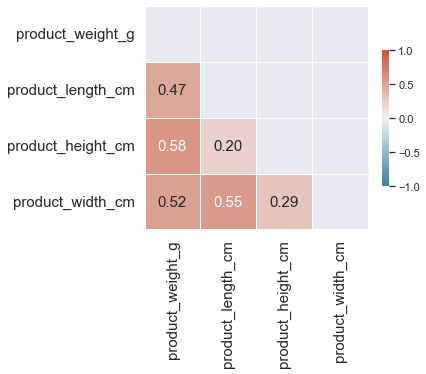

In [6]:
import seaborn as sns
sns.set_theme(style="darkgrid")

delivery_group = ['delivery_delay', 'freight_value', 'dist_to_seller',]
comment_group = ['comment_propensity', 'review_score',]
payment_group = ['payment_installments', 'payment_value',
                 'price', 'order_item_id','freight_value']
product_size_group = ['product_weight_g', 'product_length_cm', 'product_height_cm', 
                      'product_width_cm',]

for group in [delivery_group, comment_group, payment_group, product_size_group]:
    # Compute the correlation matrix
    corr = customers_data[group].corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(5, 5))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt='.2f', annot_kws={"size": 15})

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
    

# Clustering process

In [7]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Determine variables to apply clustering, clusters and intervals number
selected_columns = ['order_id', 'order_item_id', 'freight_value', 
                    'dist_to_seller', 'payment_value', 
                    'review_score', 'product_photos_qty', 
                    'comment_propensity', 'payment_installments']


# Define clusters number
clusters_n = 7

# Create scaled dataframe
dataframe = customers_data[selected_columns]
dataframe_scaled = preprocessing.StandardScaler().fit_transform(dataframe)
dataframe_scaled = pd.DataFrame(
    dataframe_scaled, columns=dataframe.columns)

# Apply KMeans on scaled dataframe
clusterer = KMeans(n_clusters=clusters_n).fit(dataframe_scaled)

# Visualization using cut

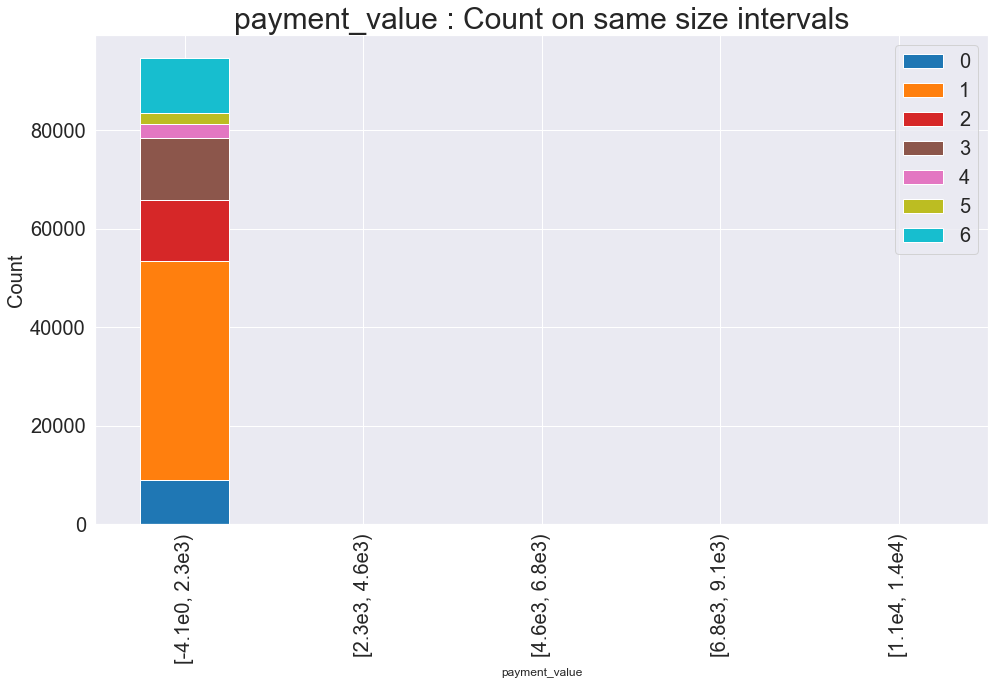

In [8]:
class MyNumber:
    def __init__(self, val):
        self.val = val

    def __format__(self, format_spec):
        ss = ('{0:'+format_spec+'}').format(self.val)
        if ('e' in ss):
            mantissa, exp = ss.split('e')
            return mantissa + 'e' + exp[2]
        return ss

# Define intervals number
intervals_n = 6
cuts = pd.cut(customers_data['payment_value'], intervals_n)

# Get count table to have how many values for each cut
cross_tab = pd.crosstab(index=cuts, columns=clusterer.labels_)

# Plot cross table representing proportion of labels in each cut
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True,
               colormap='tab10', figsize=(16, 9), ax=ax)

# Better display of intervals
left = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[0])
        for label in ax.get_xticklabels()]
right = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[1])
         for label in ax.get_xticklabels()]
xlabels_n = ['[' + '{0:1.1e}'.format(MyNumber(i)) + ', ' + '{0:1.1e}'.format(
    MyNumber(j)) + ')' for i, j in zip(left, right)]
ax.set_xticklabels(xlabels_n)

plt.title('payment_value : Count on same size intervals', size=30)
plt.ylabel("Count", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20)
plt.show()

# Visualization using quantile cut without pourcent

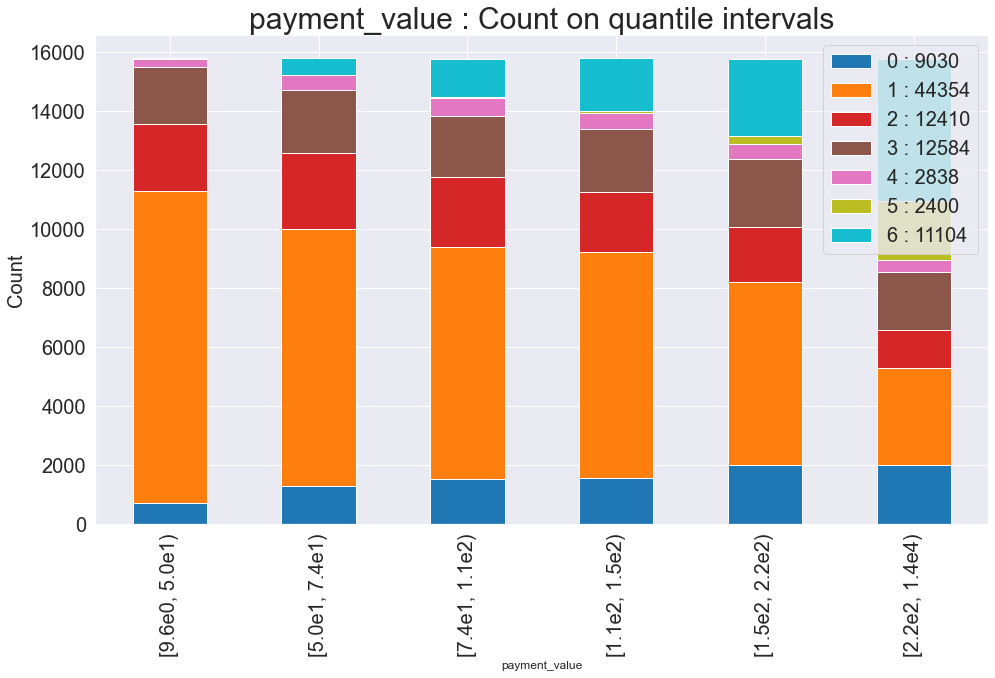

variation=1.42e+04


In [9]:
from matplotlib.ticker import FormatStrFormatter

intervals_temp = 0
cpt = intervals_n
while intervals_temp < intervals_n and cpt < 1e3:
    cuts = pd.qcut(
        customers_data['payment_value'], cpt, duplicates='drop')
    intervals_temp = len(cuts.unique())
    cpt = cpt+1

# Get count table to have how many values for each cut
cross_tab = pd.crosstab(index=cuts, columns=clusterer.labels_)

for id_ in cross_tab.columns:
    cross_tab = cross_tab.rename(
        columns={id_: str(id_)+' : '+str(cross_tab.sum().loc[id_])})

# Plot cross table representing proportion of labels in each cut
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
cross_tab.plot(kind='bar', stacked=True,
               colormap='tab10', figsize=(16, 9), ax=ax)

# Better display of intervals
left = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[0])
        for label in ax.get_xticklabels()]
right = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[1])
         for label in ax.get_xticklabels()]
xlabels_n = ['[' + '{0:1.1e}'.format(MyNumber(i)) + ', ' + '{0:1.1e}'.format(
    MyNumber(j)) + ')' for i, j in zip(left, right)]
ax.set_xticklabels(xlabels_n)

plt.title('payment_value : Count on quantile intervals', size=30)
plt.ylabel("Count", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20)
plt.show()

print('variation=' + '{0:1.2e}'.format(cross_tab.sum().std()))

# Visualization using quantile cut with pourcent

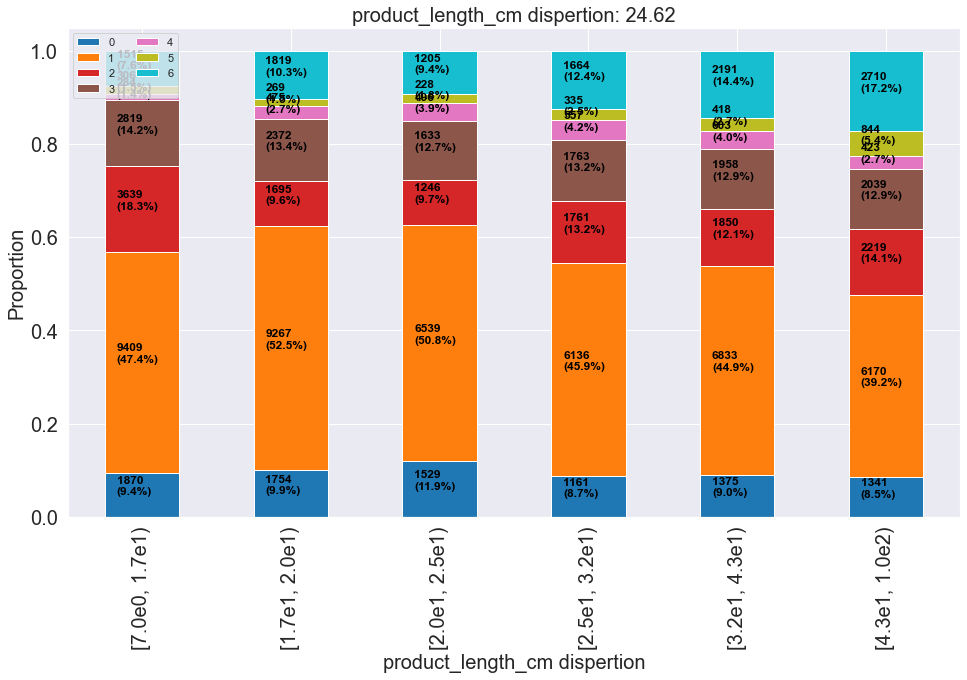

In [10]:
def visu_column_repartition(_cuts, _labels, _name):
    # Get table representing proportion of labels in each cut
    cross_tab_prop = pd.crosstab(
        index=_cuts, columns=_labels, normalize="index")
    # Get dispertion mean processing first dispertion for each label
    dispertion_mean = cross_tab_prop.apply(
        lambda x: np.std(x, ddof=1) / np.mean(x) * 100, axis=0).mean()
    # Float to string
    dispertion_mean_str = "{:.2f}".format(dispertion_mean)
    # Plot cross table representing proportion of labels in each cut
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    cross_tab_prop.plot(kind='bar', stacked=True,
                        colormap='tab10', figsize=(16, 9), ax=ax)
    # Better display of intervals
    left = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[0])
            for label in ax.get_xticklabels()]
    right = [float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", label.get_text())[1])
             for label in ax.get_xticklabels()]
    xlabels_n = ['[' + '{0:1.1e}'.format(MyNumber(i)) + ', ' + '{0:1.1e}'.format(
        MyNumber(j)) + ')' for i, j in zip(left, right)]
    ax.set_xticklabels(xlabels_n)
    # Get count table to have how many values for each cut
    cross_tab = pd.crosstab(index=_cuts, columns=_labels)
    # Display count table
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab.loc[x],
                                              cross_tab_prop.loc[x].cumsum()):
            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title(_name+' dispertion: '+dispertion_mean_str, size=20)
    plt.legend(loc="upper left", ncol=2)
    plt.xlabel(_name+' dispertion', size=20)
    plt.ylabel("Proportion", size=20)
    plt.show()


def visu_repartition(_dataframe, _labels):

    for column in _dataframe.columns:
        intervals_temp = 0
        cpt = intervals_n
        while intervals_temp < intervals_n and cpt < 5e2:
            cuts = pd.qcut(_dataframe[column], cpt, duplicates='drop')
            intervals_temp = len(cuts.unique())
            cpt = cpt+1

        visu_column_repartition(cuts, _labels, column)


visu_repartition(pd.DataFrame(customers_data['product_length_cm'],
                              columns=['product_length_cm']), 
                              clusterer.labels_)